In [1]:
# 📚 Basic libraries
import pandas as pd
import numpy as np 
import scipy.stats as stats

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler

# Model Regression
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [2]:
import sys
import os
import pickle

# Add the 'utils' folder to the sys.path
sys.path.append(os.path.abspath(os.path.join('utils')))

# Now import the lasso_model.py module
import lasso_model

<h2 style="color: #00aaff;">Data Extraction</h2>

In [3]:
# Data extraction
data = pd.read_csv('dataset/king_country_houses_aa.csv')
df = data.copy()
df.head(10) # Exploring the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
num_df = df.drop(columns = ['id', 'date'])
num_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
# select continuous variables
continuous_df = num_df.loc[:, num_df.nunique() > 20]
continuous_df

,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,1.00,1180,5650,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,2.25,2570,7242,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,1.00,770,10000,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,3.00,1960,5000,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,2.00,1680,8080,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,2.50,1530,1131,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,2.50,2310,5813,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,0.75,1020,1350,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,2.50,1600,2388,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
# Drop the following columns: yr_built,	yr_renovated, zipcode, bathrooms
continuous_df = continuous_df.drop(columns=['zipcode', 'bathrooms'])

<h2 style="color: #00aaff;">Dealing with multicollinearity</h2>

In [7]:
# Move the price column (target) to the last position for better analysis 
target = continuous_df.pop("price")
continuous_df["price"] = target
continuous_df.head(5)

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,1180,5650,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,2570,7242,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,770,10000,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,1960,5000,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,1680,8080,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0


In [8]:
num_corr = round(continuous_df.corr(), 2)

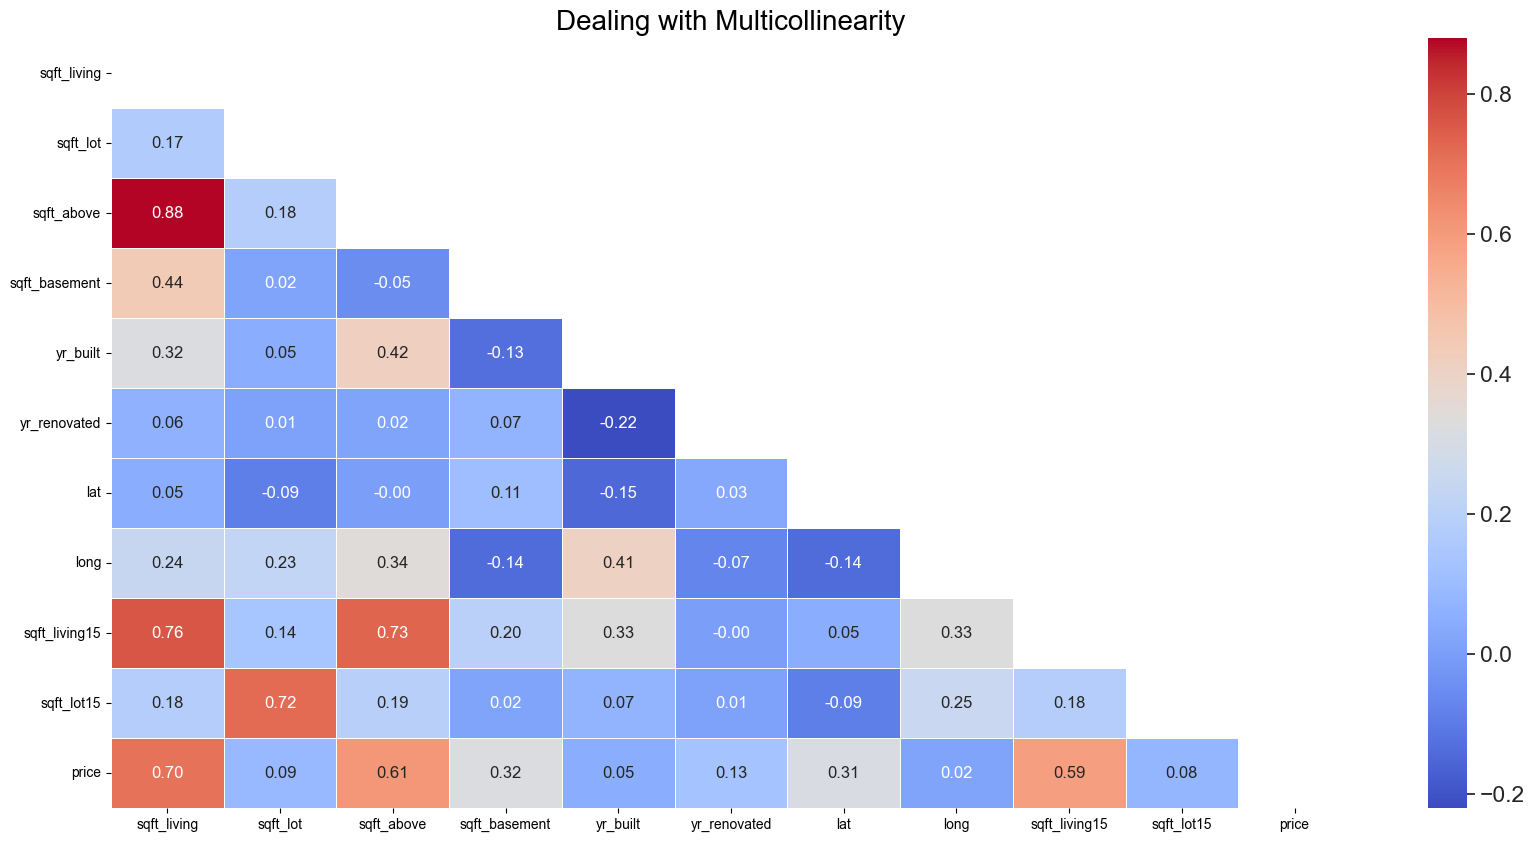

In [9]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

- `sqft_lot` has a high correlation with `sqft_lot15` for doing the regression we will take it out
- `zipcode` has a moderate negative relationship with `long`

In [10]:
ml_df = continuous_df.drop(columns=['sqft_lot','yr_built', 'long', 'sqft_lot15'])
ml_df

,sqft_living,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,price
0,1180,1180,0,0,47.5112,1340,221900.0
1,2570,2170,400,1991,47.7210,1690,538000.0
2,770,770,0,0,47.7379,2720,180000.0
3,1960,1050,910,0,47.5208,1360,604000.0
4,1680,1680,0,0,47.6168,1800,510000.0
...,...,...,...,...,...,...,...
21608,1530,1530,0,0,47.6993,1530,360000.0
21609,2310,2310,0,0,47.5107,1830,400000.0
21610,1020,1020,0,0,47.5944,1020,402101.0
21611,1600,1600,0,0,47.5345,1410,400000.0


<h1 style="color: #00aaff;">01 | Modeling: Lasso</h1>

### X-y Split

In [11]:
# Split X and y
X = ml_df.drop(columns="price")
y = ml_df.price

### Testing test size for Lasso

In [12]:
l_model = Lasso()

In [13]:
# Checking which is the best test_size for Lasso model
random_state = 42
lasso_model.regression_metrics(X, y, ml_df, random_state,l_model,  standardize = True)

10.0% test size
100% of our data: 21613.
90.0% for training data: 19451.
10.0% for test data: 2162.

20.0% test size
100% of our data: 21613.
80.0% for training data: 17290.
20.0% for test data: 4323.

30.0% test size
100% of our data: 21613.
70.0% for training data: 15129.
30.0% for test data: 6484.

40.0% test size
100% of our data: 21613.
60.0% for training data: 12967.
40.0% for test data: 8646.



,test_size,r2,rmse,mse,mae
0,10.0%,0.554,255030.185,65040395428.729,157207.909
1,20.0%,0.576,253035.473,64026950522.580,153584.794
2,30.0%,0.571,248824.119,61913442375.869,152741.410
3,40.0%,0.574,252487.735,63750056404.029,150306.094


### Train-test Split

In [14]:
# 20% of test size is the one with better performance
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42) 

<h2 style="color: #00aaff;">Lasso Regression</h2>

### Standardization

In [15]:
# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Fit and predict

In [16]:
l_model.fit(X_train_scaled, y_train)

Lasso()

In [17]:
predictions_lasso = l_model.predict(X_test_scaled)

<h2 style="color: #00aaff;">Model Validation</h2>

In [18]:
metrics_lasso_df =lasso_model.regression_validation(y_test, predictions_lasso)
metrics_lasso_df

,Metrics,Values
0,R2,0.5765
1,RMSE,253035.4729
2,MSE,64026950522.5798
3,MAE,153584.7936


In [19]:
# Predict on the training and testing sets
lasso_model.test_train_r_analysis(l_model, X_train_scaled, X_test_scaled, y_train, y_test)

R2 train:  0.581
R2 test:  0.576


In [20]:
# Save model in pickle
if not os.path.exists('models/lasso_model.pkl'):  # Check if the file already exists
        # Save the model to a file
    with open('models/lasso_model.pkl', 'wb') as file:
        pickle.dump(l_model, file)
else:
    print("lasso_model.pkl already exists. File not overwritten.")

lasso_model.pkl already exists. File not overwritten.


<h2 style="color: #00aaff;">Reporting</h2>

In [21]:
def model_validation(results_df, final_model):
    """
    The function `model_validation` generates various diagnostic plots and learning/validation curves
    for evaluating a regression model's performance.
    
    Parameters:
        - results_df: The `results_df` parameter is a DataFrame containing the following columns: 
                    ["Actual Price", "Predicted Price", "Difference"]. 
        - final_model: The trained machine learning model that you want to evaluate and validate. 
    """

    y_actual = results_df['Actual Price']  
    y_pred = results_df['Predicted Price']
    residuals = results_df['Difference']

    # 1. Actual vs. Predicted Values
    plt.figure(figsize=(8, 6))
    sns.regplot(x='Actual Price', y='Predicted Price', data=results_df,
                scatter_kws={"color": "blue", "alpha": 0.5},
                line_kws={"color": "red", "linewidth": 3},
                ci=100)
    plt.ylim(bottom=0)
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Actual')
    plt.ylabel('Predictions')
    plt.show()

    # 2. Residuals vs. Predicted Values
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Predicted Values")
    plt.show()

    # 3. Histogram of Residuals
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, bins=60, kde=True)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Distribution of Residuals")
    plt.show()

    # 4. Q-Q Plot to check normality of residuals
    plt.figure(figsize=(8, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")
    plt.show()

In [22]:
## dataframe with actual vs predictions
# Make a dataframe to compare
eval_df = lasso_model.reporting_dataframe(X_test_scaled, y_test, l_model)
eval_df.columns = ['Actual Price','Predicted Price', 'Difference']

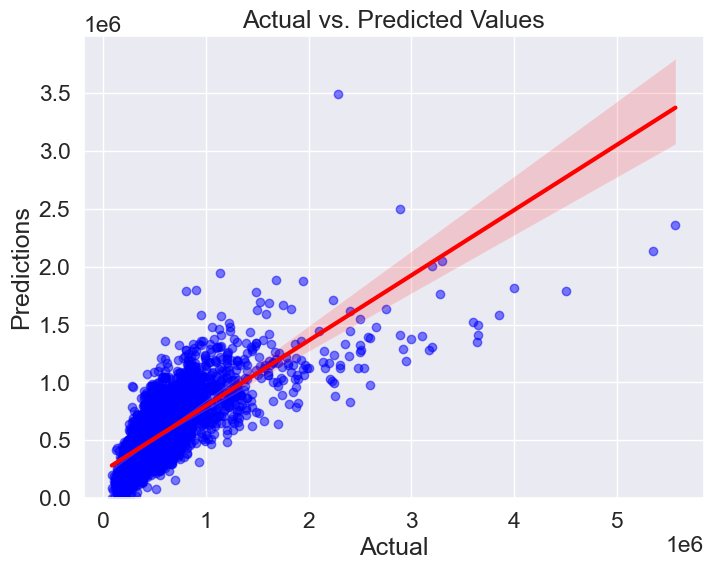

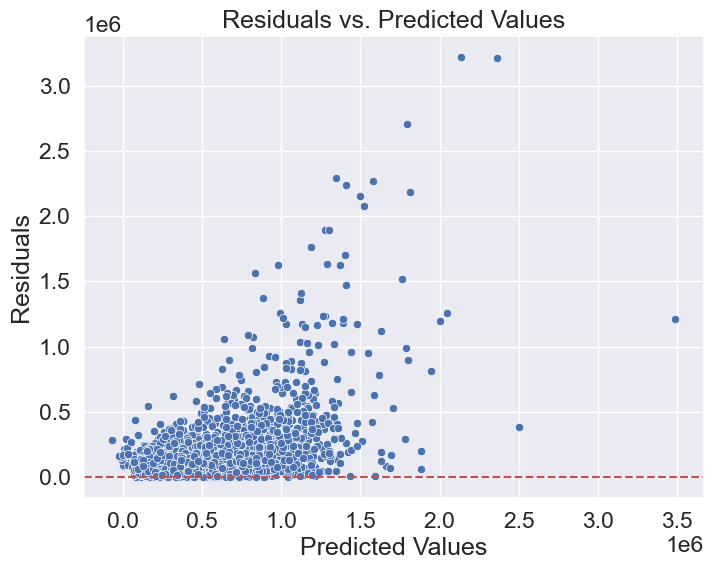

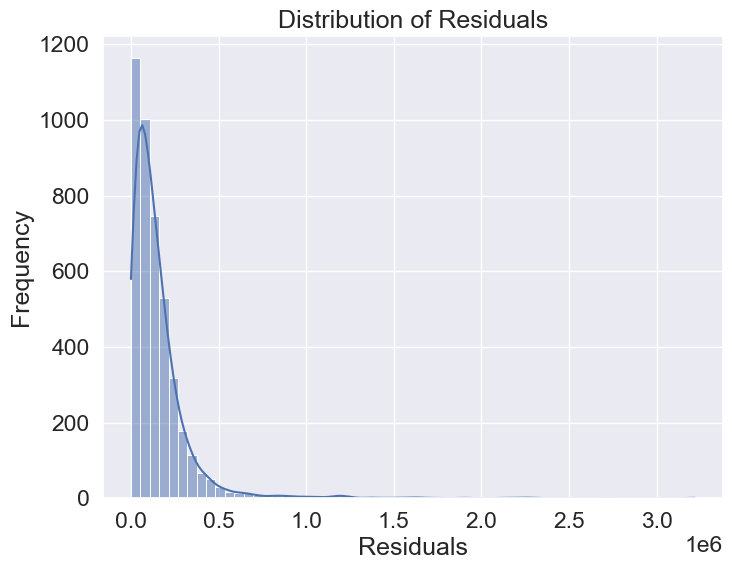

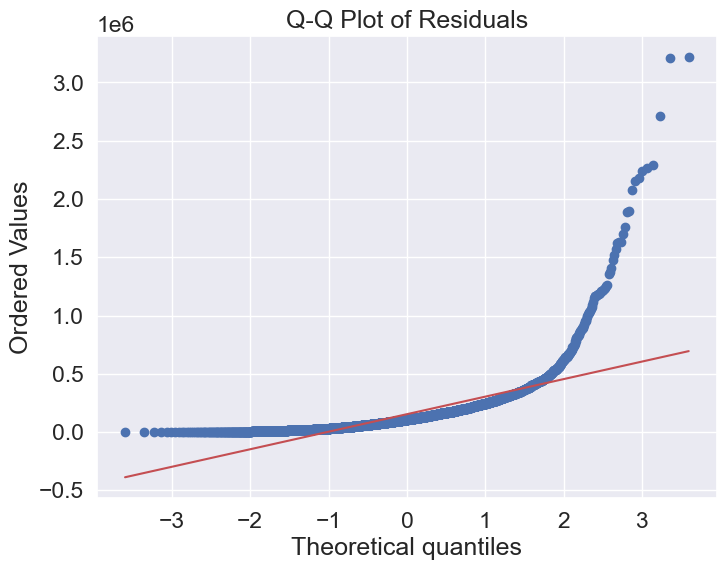

In [23]:
model_validation(eval_df, l_model)

<h1 style="color: #00aaff;">02 | Modeling: XG Boost</h1>

### Testing test size for XG Boost

In [24]:
xgb_model = xgb.XGBRFRegressor()

In [25]:
# Checking which is the best test_size for XG Boost model
random_state = 42
lasso_model.regression_metrics(X, y, ml_df, random_state, xgb_model)

10.0% test size
100% of our data: 21613.
90.0% for training data: 19451.
10.0% for test data: 2162.

20.0% test size
100% of our data: 21613.
80.0% for training data: 17290.
20.0% for test data: 4323.

30.0% test size
100% of our data: 21613.
70.0% for training data: 15129.
30.0% for test data: 6484.

40.0% test size
100% of our data: 21613.
60.0% for training data: 12967.
40.0% for test data: 8646.



,test_size,r2,rmse,mse,mae
0,10.0%,0.688,213203.015,45455525519.582,116245.595
1,20.0%,0.667,224404.614,50357430804.686,115548.155
2,30.0%,0.667,219363.678,48120423391.797,114329.488
3,40.0%,0.677,219735.393,48283642807.452,112669.574


### Train-test Split

In [26]:
# 10% of test size is the one with better performance
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.1, random_state=42) 

<h2 style="color: #00aaff;">XGBoost Regression</h2>

### Grid Search for Hyperparameter Tuning in XGBoost

In [27]:
# Perform cross-validation

# Define different k values
k_values = [2, 3, 4, 5]

# Store results for comparison
results = {}

# Perform cross-validation with different k values
for k in k_values:
    cv_scores = cross_val_score(xgb_model, X, y, cv=k, scoring='r2')  # Use R² as the scoring metric
    results[k] = np.mean(cv_scores).round(4)
    print(f"Mean R² score for k={k}: {results[k]}")


Mean R² score for k=2: 0.6774
Mean R² score for k=3: 0.7025
Mean R² score for k=4: 0.6975
Mean R² score for k=5: 0.6964


### Fit and predict

In [28]:
xgb_model.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [29]:
# Calculate R² scores for training and testing
lasso_model.test_train_r_analysis(xgb_model, X_train, X_test, y_train, y_test)

R2 train:  0.746
R2 test:  0.688


In [30]:
# Save model in pickle
if not os.path.exists('models/xgboost_model.pkl'):  # Check if the file already exists
        # Save the model to a file
    with open('models/xgboost_model.pkl', 'wb') as file:
        pickle.dump(xgb_model, file)
else:
    print("xgboost_model.pkl already exists. File not overwritten.")

xgboost_model.pkl already exists. File not overwritten.


<h2 style="color: #00aaff;">Reporting</h2>

In [31]:
def model_validation(results_df, final_model):
    """
    The function `model_validation` generates various diagnostic plots and learning/validation curves
    for evaluating a regression model's performance.
    
    Parameters:
        - results_df: The `results_df` parameter is a DataFrame containing the following columns: 
                    ["Actual Price", "Predicted Price", "Difference"]. 
        - final_model: The trained machine learning model that you want to evaluate and validate. 
    """

    y_actual = results_df['Actual Price']  
    y_pred = results_df['Predicted Price']
    residuals = results_df['Difference']

    # 1. Actual vs. Predicted Values
    plt.figure(figsize=(8, 6))
    sns.regplot(x='Actual Price', y='Predicted Price', data=results_df,
                scatter_kws={"color": "blue", "alpha": 0.5},
                line_kws={"color": "red", "linewidth": 3},
                ci=100)
    plt.ylim(bottom=0)
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Actual')
    plt.ylabel('Predictions')
    plt.show()

    # 2. Residuals vs. Predicted Values
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Predicted Values")
    plt.show()

    # 3. Histogram of Residuals
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, bins=60, kde=True)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Distribution of Residuals")
    plt.show()

    # 4. Q-Q Plot to check normality of residuals
    plt.figure(figsize=(8, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")
    plt.show()

In [32]:
# dataframe with actual vs predictions
# Make a dataframe to compare
eval_x_df = lasso_model.reporting_dataframe(X_test, y_test, xgb_model)
eval_x_df.columns = ['Actual Price','Predicted Price', 'Difference']

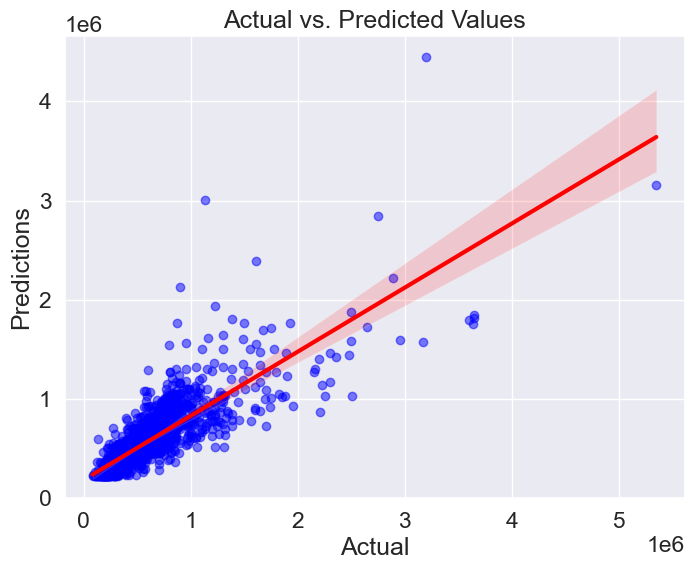

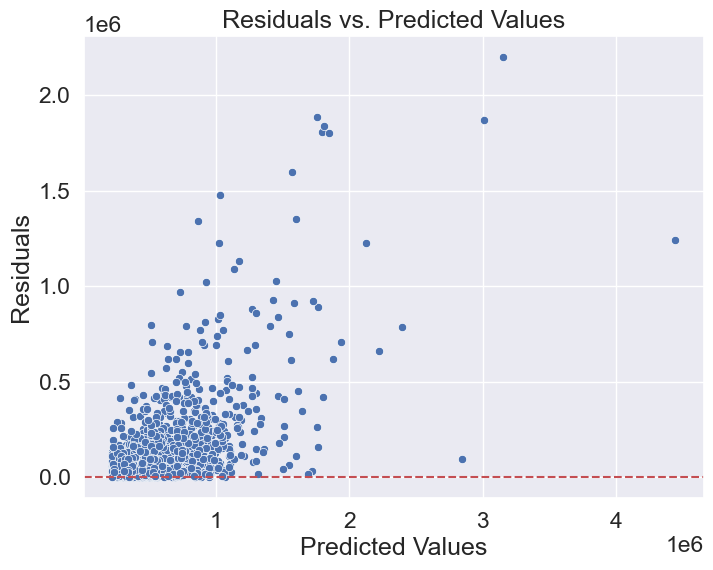

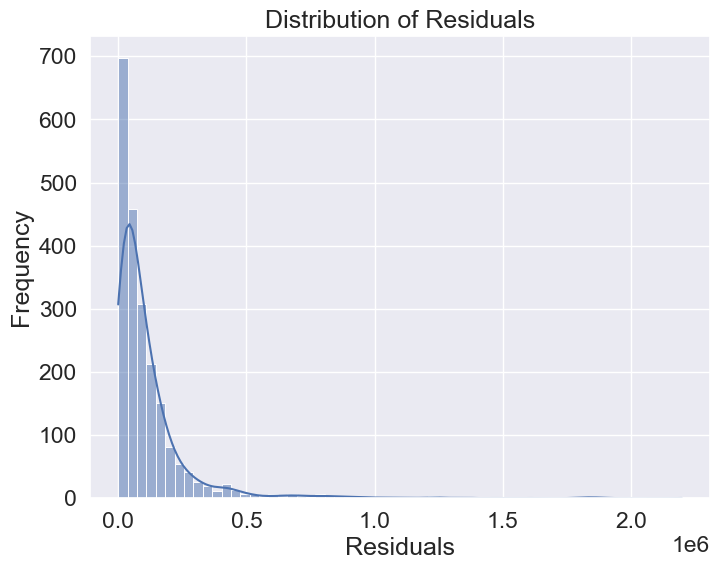

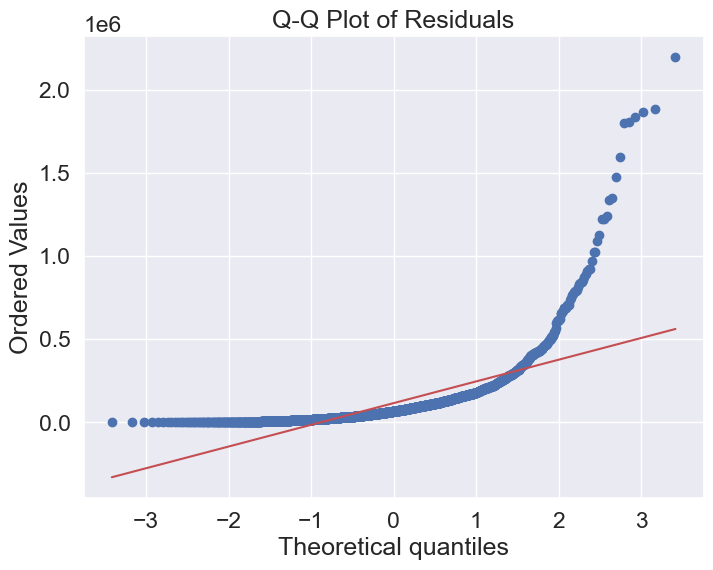

In [33]:
model_validation(eval_x_df, xgb_model)